In [7]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
digits=load_digits()

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
tsne=TSNE(n_components=2, random_state=11)
reduced_data=tsne.fit_transform(digits.data)

In [12]:
digits.data.shape

(1797, 64)

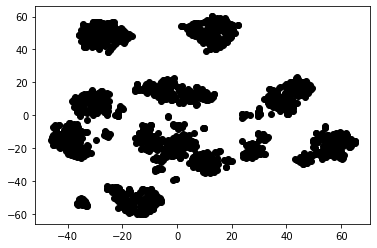

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

dots=plt.scatter(reduced_data[:,0], reduced_data[:,1], c='black')

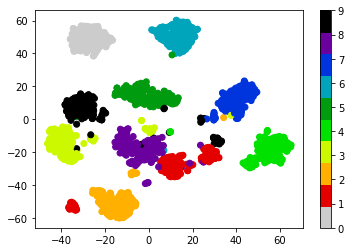

In [16]:
dots=plt.scatter(reduced_data[:,0], reduced_data[:,1], c=digits.target,
                 cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
colorbar=plt.colorbar(dots)

In [17]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris=load_iris()
pca=PCA(n_components=2, random_state=11)

In [18]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
iris.data.shape

(150, 4)

In [26]:
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

In [27]:
iris_pca=pca.transform(iris.data)

In [31]:
import pandas as pd
pd.set_option('max_columns', 5)
pd.set_option('display.width', None)

iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species']=[iris.target_names[i] for i in iris.target]



iris_pca_df=pd.DataFrame(iris_pca, columns=['Component1', 'Component2'])
iris_pca_df['species']=iris_df.species

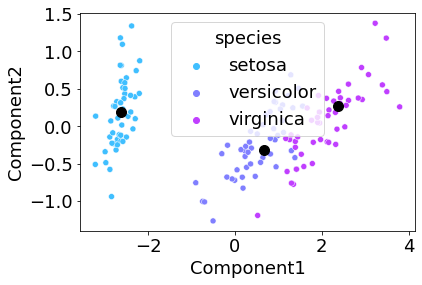

In [37]:
import seaborn as sns
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=11)
kmeans.fit(iris.data)
axes=sns.scatterplot(data=iris_pca_df, x='Component1', y='Component2', hue='species', legend='brief',
                     palette='cool')
iris_centers=pca.transform(kmeans.cluster_centers_)

dots=plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

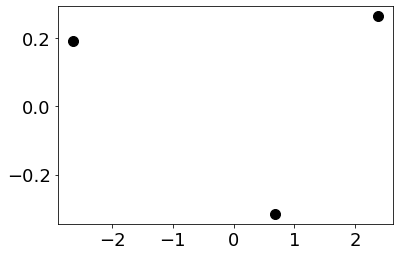

In [ ]:
a_set={tuple(y)}
a_set

In [21]:

from skimage import data

mpl.rcParams["font.size"] = 18

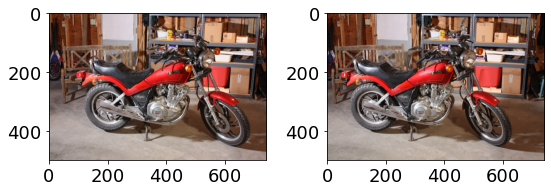

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

cycle_images = data.stereo_motorcycle()
ax[0].imshow(cycle_images[0])
ax[1].imshow(cycle_images[1])

fig.tight_layout()
plt.show()

In [ ]:
plt.imshow(cycle_images[0])
plt.axis("off")
plt.show()

In [36]:
type(cycle_images[0])

numpy.ndarray

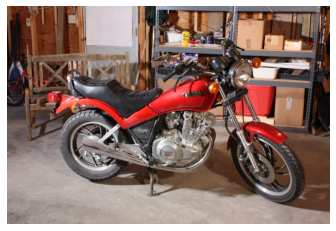

In [56]:
image=cycle_images[0]
plt.imshow(image)
plt.axis("off")
plt.show()

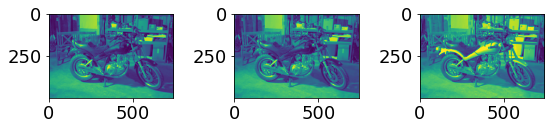

(500, 741)

In [67]:
import numpy as np
red=np.zeros([500,741])
blue=np.zeros([500,741])
green=np.zeros([500,741])

green=image[:,:,0]
blue= image[:,:,1]
red=image[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

 
ax[0].imshow(red)
ax[1].imshow(blue)
ax[2].imshow(green)

fig.tight_layout()
 

In [1]:
#initialize PCA with first 20 principal components
pca = PCA(100)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

NameError: name 'PCA' is not defined

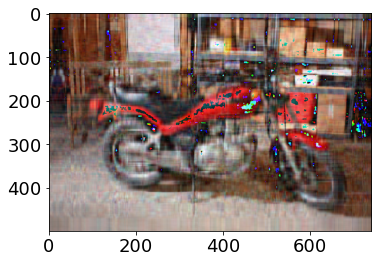

In [75]:
img_compressed = (np.dstack((green_inverted, blue_inverted, red_inverted))).astype(np.uint8)
plt.imshow(img_compressed)

In [62]:
img_compressed.shape

(500, 741, 3)